In [50]:
# Adarsh Anand
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, mean_absolute_error,roc_auc_score)
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,RandomForestRegressor)
import re,random,sys,json,time,os,warnings,pickle,datetime,subprocess,requests,math
import pyforest,klib,missingno as msno
import numpy as np, pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from typing import List, Dict, Tuple, Any
#import keras as kr,tensoflow   as tf,cv2 as cv
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

                
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='Blues', font='Arial', rc={'figure.figsize': (10, 8)})

In [51]:
df=pd.read_csv('./data/salary.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.00,5.50,3.03,1.00,3.25,5.50,7.75,10.00
Salary,10.00,249500.00,299373.88,45000.00,65000.00,130000.00,275000.00,1000000.00


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [37]:
ProfileReport(df, title='Pandas Profiling Report')

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  8.80it/s]


In [38]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [39]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [40]:
y


array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [41]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=10,random_state=123)

In [42]:
regressor.fit(X, y)

RandomForestRegressor(max_depth=10, random_state=123)

In [43]:
regressor.predict([[6.5]])

array([165900.])

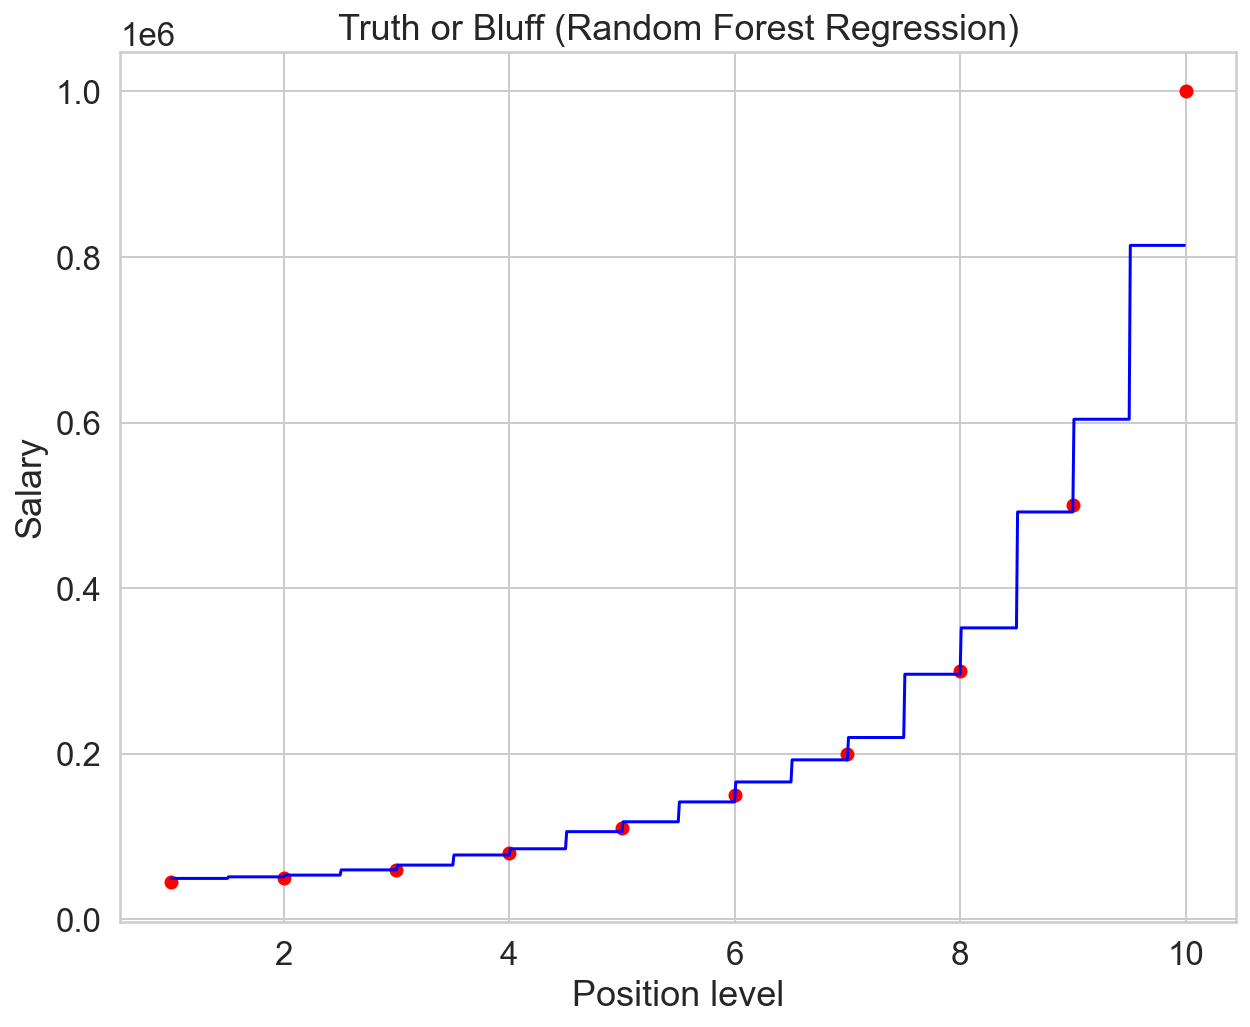

In [44]:
# Visualising the Random Forest Regression results (higher resolution) for 10 decision trees

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();

So like Decision Tree Regression, Random Forest regression is also a non-continous model. As in the case of Decision Tree regression, more the number of intervals or more the organized intervals more is the accuracy, number of intervals can be increased by using more number of decision trees so that average of all predicted values will improve the number of intervals upon which algorithm is branched.So let's increase the number of trees and visualise the results.

In [45]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(random_state=0)

In [46]:
y_pred = regressor.predict([[6.5]])
print(y_pred)

[158300.]


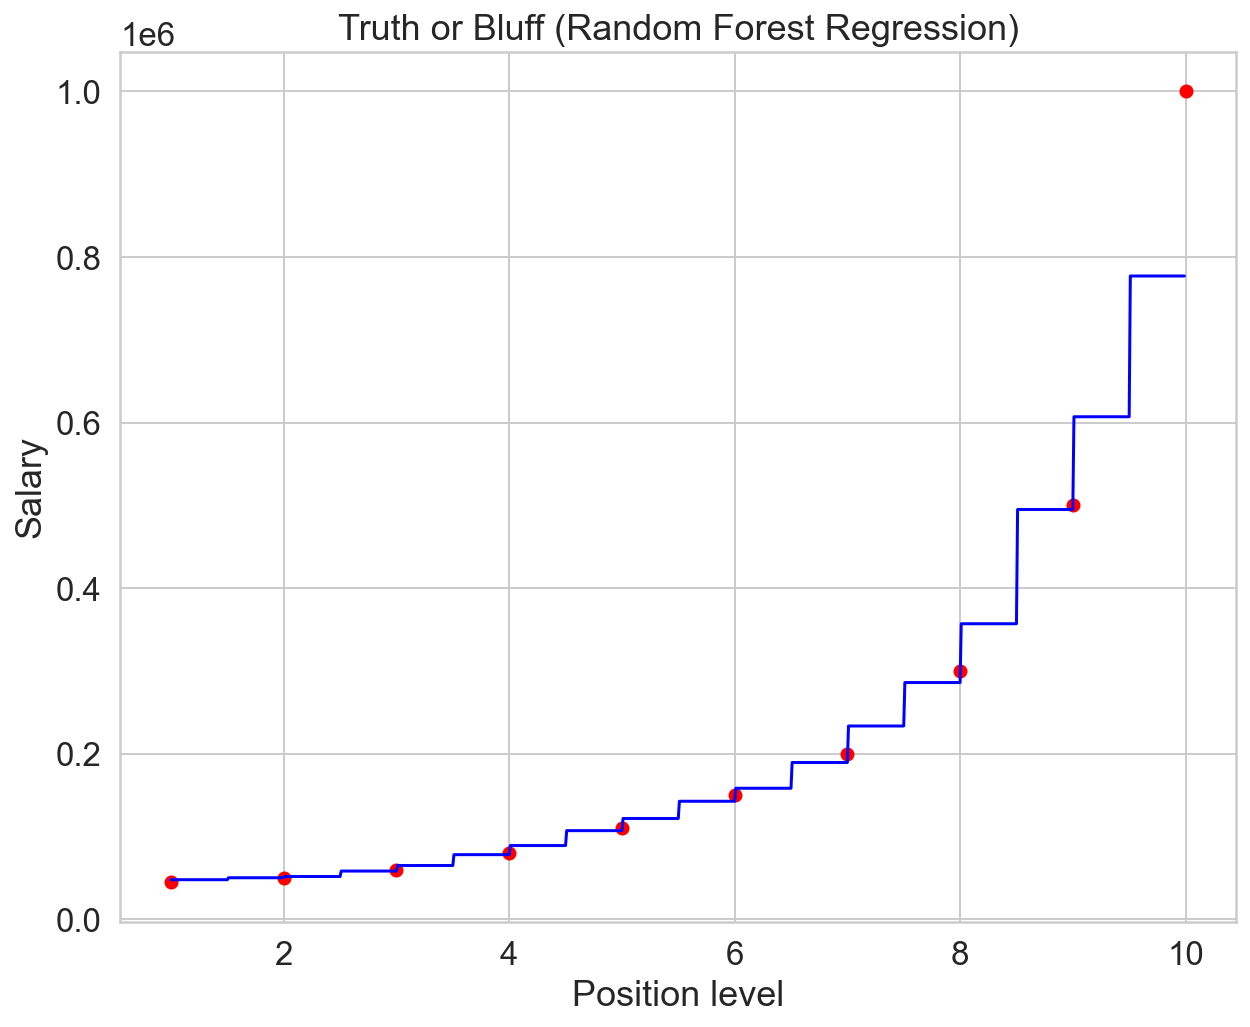

In [47]:
# Visualising the Random Forest Regression results (higher resolution) for 100 decision trees
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();

In [48]:
# Fitting Random Forest Regression to the dataset (with 300 decision trees)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=300, random_state=0)

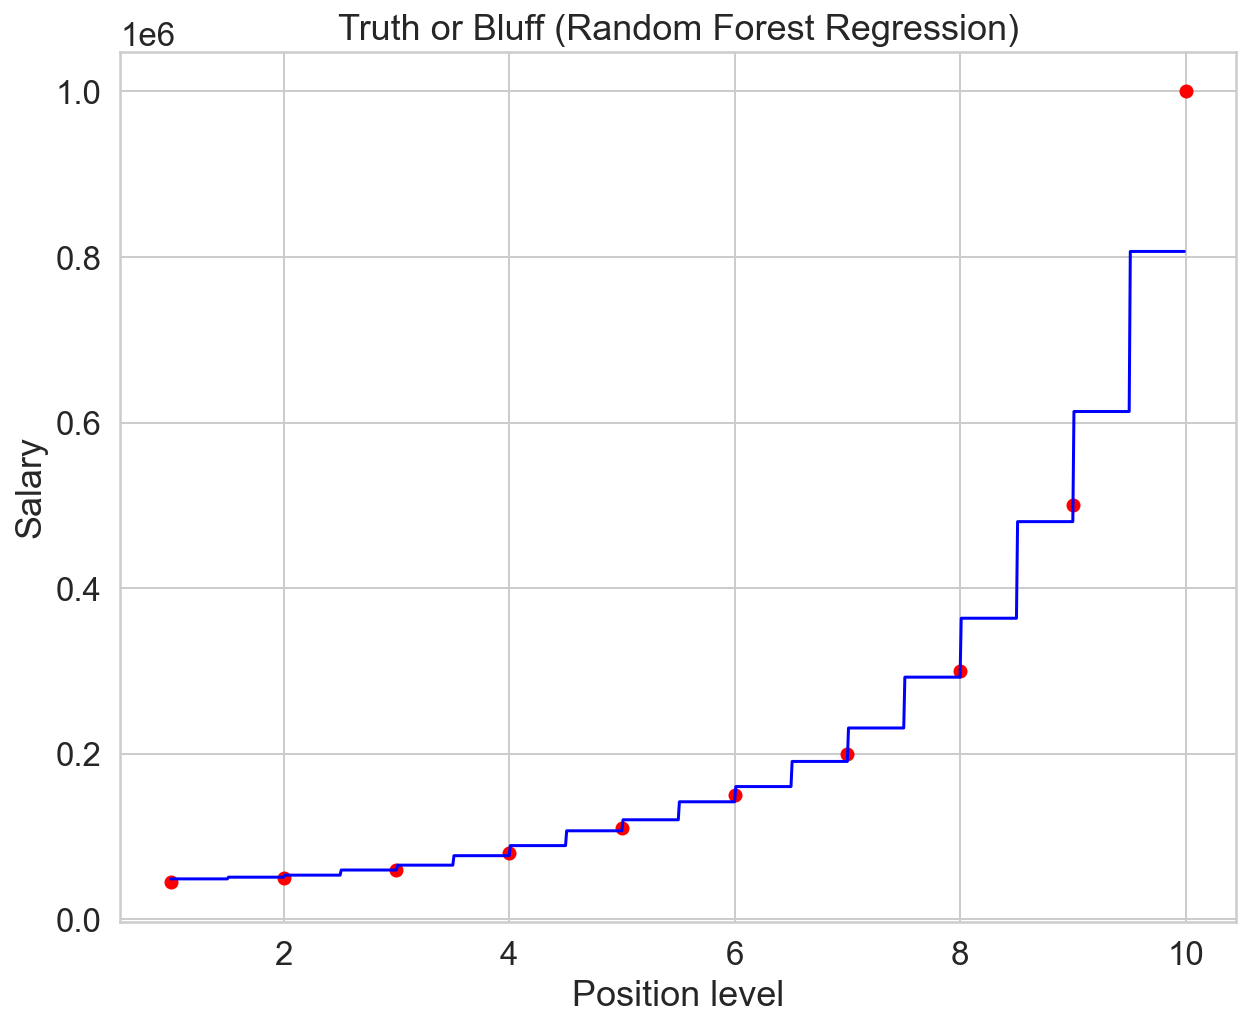

In [49]:
# Visualising the Random Forest Regression results (higher resolution) for 300 decision trees
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();